Описание/Пошаговая инструкция выполнения домашнего задания:
* Взять код из занятия.
* Добавить свою Сеть/Модель в конец.
* Обучить свой классификатор на PCA датасете.

In [1]:
import numpy as np # Работа с алгеброй
import pandas as pd # Обработка данных

#Визуализация
import matplotlib.pyplot as plt

#ML
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

#System
import os


<a class="anchor" id="2."></a>Olivetti Dataset

Описание:

* Все изображения взяты между 1992 и 1994 годами.
* 40 людей, 10 изображений каждого.
* Это результирует в 400 изображениях
* Изображения были сняты в разное время, с разным освещением и с разным поворотом головы
* На всех изображениях черный задник
* Изображения нормализованны по высоте
* Размер изображения 64x64
* Значения пикселей изображений нормированны в [0, 1] 
* Каждому человеку был присвоен номер от 0 до 39


In [2]:
data = np.load("olivetti_faces.npy")
target = np.load("olivetti_faces_target.npy")

In [3]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [4]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [5]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

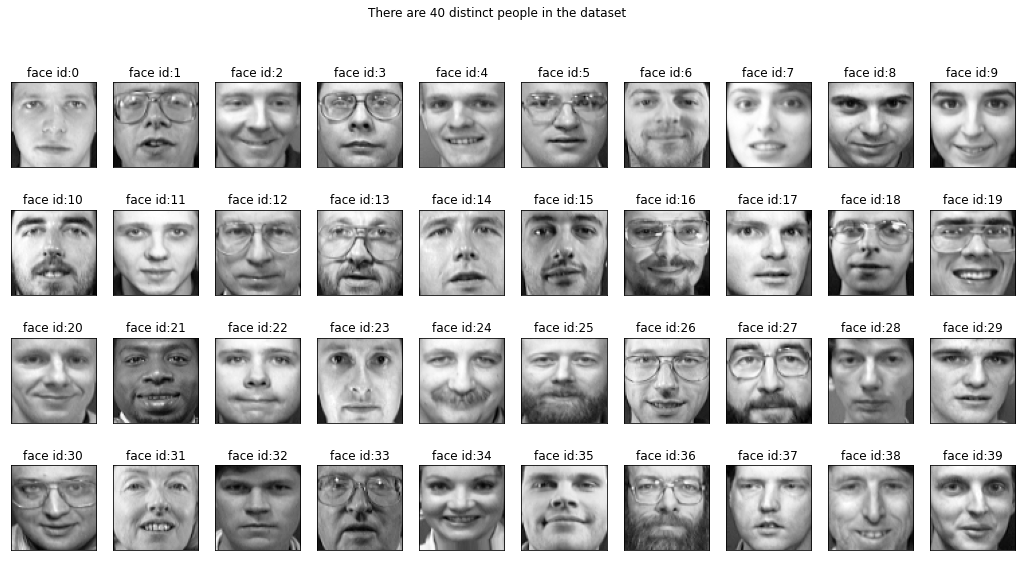

In [6]:
show_40_distinct_people(data, np.unique(target))

In [7]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

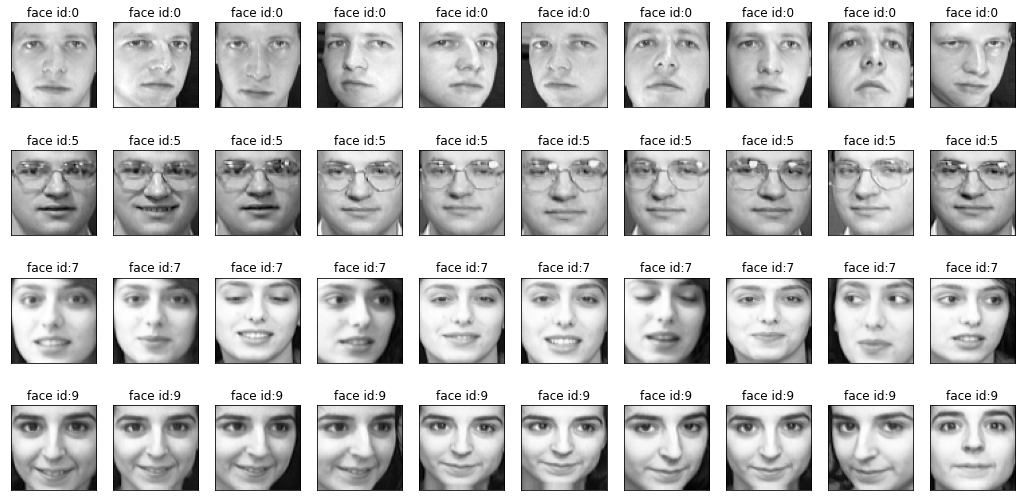

In [8]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 7, 9])

In [9]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

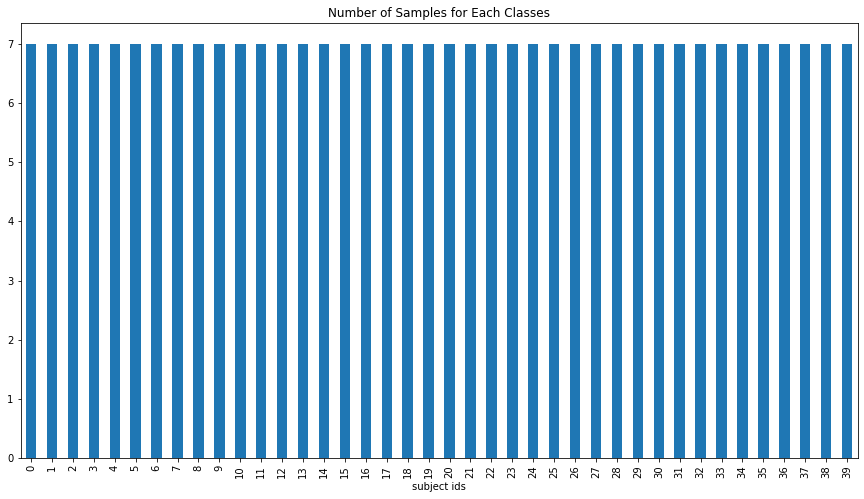

In [11]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

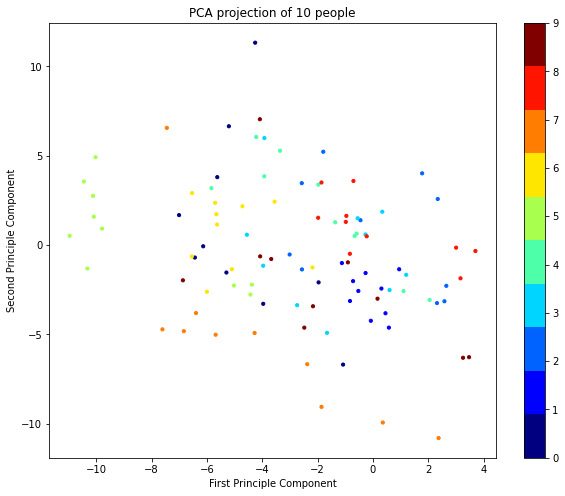

In [13]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

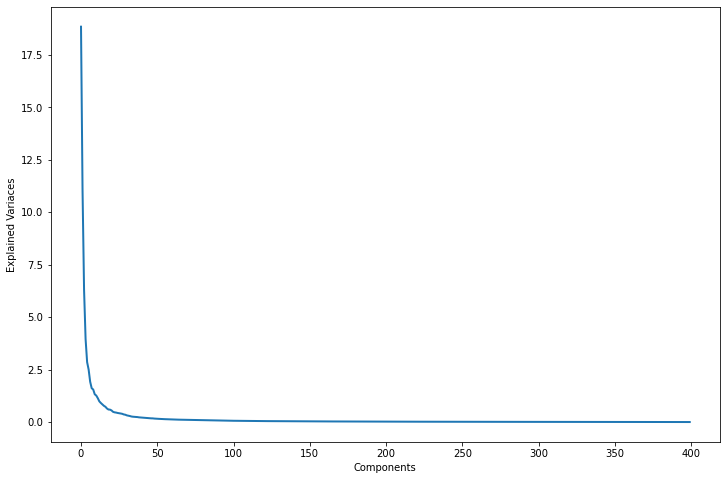

In [14]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

По графику сверху, мы можем увидеть что увеличение количества компонент выше 90 не дает нам значимого улучшения

In [15]:
n_components=90

In [16]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

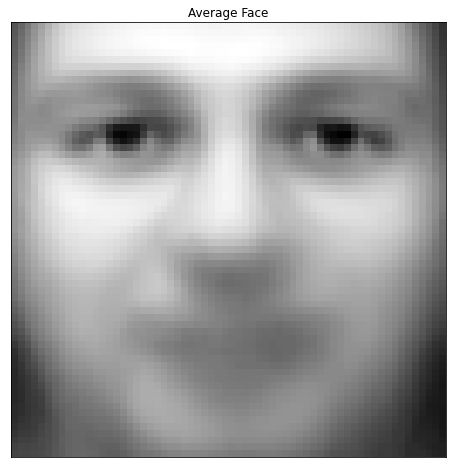

In [17]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

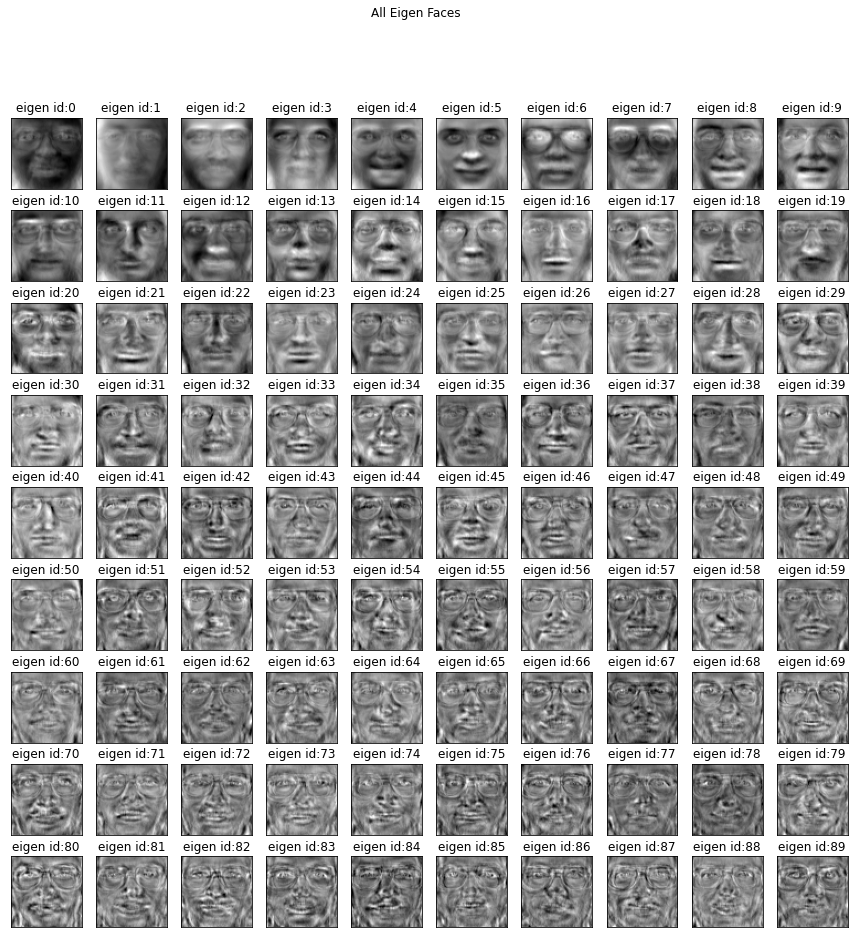

In [18]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [19]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [20]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.92


Сначала попробуем взять классификаторы из классического ML, такие как логиситическая регрессия, К-ближайших соседей и Случайный лес

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
r_forrest = RandomForestClassifier()

In [23]:
r_forrest_params = {'n_estimators':range(100,200,20),
                    'max_depth':range(5,13,3),
                    'min_samples_leaf':range(2,5),
                    'min_samples_split':range(2,10,2)
                    }

In [24]:
log_reg_params = {'max_iter':range(50,501,50)}

In [25]:
knn_params = {'algorithm':['ball_tree','kd_tree','brute'],
              'leaf_size': range(2,91,30),
             }

In [26]:
grid_knn = GridSearchCV(knn,knn_params,cv=5)
grid_log_reg = GridSearchCV(log_reg,log_reg_params,cv=5)
grid_forest = GridSearchCV(r_forrest,r_forrest_params,cv=5)

In [27]:
grid_knn = GridSearchCV(knn,knn_params,cv=5)


In [28]:
grid_knn.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(2, 91, 30)})

In [29]:
grid_log_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': range(50, 501, 50)})

In [30]:
grid_forest.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 13, 3),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(100, 200, 20)})

In [31]:
y_pred_rf = grid_forest.best_estimator_.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_rf)))

accuracy score:0.90


In [32]:
y_pred_lr = grid_log_reg.best_estimator_.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_lr)))

accuracy score:0.93


In [33]:
y_pred = grid_knn.best_estimator_.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.68


Как видим, лучшая точность у логистической регрессии, попробуем написать простую нейронную сеть.

In [34]:
import tensorflow as tf

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512,input_shape=(90,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(40, activation = 'softmax')
])



In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [37]:
model.fit(X_train_pca, y_train,epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 6ms/step - loss: 4.4860 - accuracy: 0.0321
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 3.4436 - accuracy: 0.1464
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 2.8158 - accuracy: 0.2893
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 2.1194 - accuracy: 0.4143
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 1.7110 - accuracy: 0.5500
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 1.2996 - accuracy: 0.6786
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 1.0923 - accuracy: 0.7179
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8337 - accuracy: 0.8179
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7207 - accuracy: 0.8250
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5703 - accuracy: 0.8750
Epoch 11/100
9/9 [===========

9/9 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.9964
Epoch 85/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 86/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 87/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0265 - accuracy: 0.9929
Epoch 88/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 89/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9964
Epoch 90/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 91/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9929
Epoch 92/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0169 - accuracy: 0.9964
Epoch 93/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 0.9964
Epoch 94/100
9/9 [===============

In [38]:
model.evaluate(X_test_pca,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.3852 - accuracy: 0.9250


[0.38522282242774963, 0.925000011920929]

Точность с нейронной сетью составила 95 процентов, наивысшее значение, которое удалось получить

VOTING CLASSIFIER

In [41]:
from scikeras.wrappers import KerasClassifier

In [42]:
model_nn = KerasClassifier(build_fn=model, epochs=100, batch_size=5, verbose=0)
model_nn._estimator_type = "classifier"

In [60]:
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, GradientBoostingClassifier

In [44]:
eclf1 = VotingClassifier(estimators=[('lr', grid_log_reg.best_estimator_), ('rf', grid_forest.best_estimator_), ('knn', grid_knn.best_estimator_), ('keras', model_nn)], voting='hard')
eclf1 = eclf1.fit(X_train_pca, y_train)
y_pred_eclf1 = eclf1.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_eclf1)))

INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpjm0etc_a\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


accuracy score:0.93


In [47]:
eclf1 = eclf1.set_params(knn='drop')
eclf1 = eclf1.fit(X_train_pca, y_train)
y_pred_eclf1 = eclf1.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_eclf1)))

INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmp576ehw6z\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


accuracy score:0.93


In [54]:
eclf1 = eclf1.set_params(knn='drop', rf='drop')
eclf1 = eclf1.fit(X_train_pca, y_train)
y_pred_eclf1 = eclf1.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_eclf1)))

INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpaxkx0grf\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


accuracy score:0.92


BEST RESULT

In [45]:
eclf2 = VotingClassifier(estimators=[('lr', grid_log_reg.best_estimator_), ('rf', grid_forest.best_estimator_), ('knn', grid_knn.best_estimator_), ('keras', model_nn)], voting='soft')
eclf2 = eclf2.fit(X_train_pca, y_train)
y_pred_eclf2 = eclf2.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_eclf2)))

INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpr5iu2lua\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


accuracy score:0.94


In [46]:
eclf2 = eclf2.set_params(knn='drop')
eclf2 = eclf2.fit(X_train_pca, y_train)
y_pred_eclf2 = eclf2.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_eclf2)))

INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmps25xsl4g\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


accuracy score:0.93


In [48]:
eclf2 = eclf2.set_params(knn='drop', rf='drop')
eclf2 = eclf2.fit(X_train_pca, y_train)
y_pred_eclf2 = eclf2.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_eclf2)))

INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpgba7ksse\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


accuracy score:0.93


In [49]:
len(eclf2.estimators_)

2

STACKING CLASSIFIER

In [52]:
level0 = list()
level0.append(('lr', grid_log_reg.best_estimator_))
level0.append(('nn', model_nn))
level0.append(('rf', grid_forest.best_estimator_))
level1 = LogisticRegression()
stclf = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [53]:
stclf = stclf.fit(X_train_pca, y_train)
y_pred_stclf = stclf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_stclf)))

INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmp_3xh0usi\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmp66xmothd\assets
INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpt059onsr\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpz_88vss7\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpbwd498x7\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmp5357wq6d\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpy1_y0t76\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


accuracy score:0.93


Let's remove the classifier with the lowest accuracy - RF

In [55]:
level0 = list()
level0.append(('lr', grid_log_reg.best_estimator_))
level0.append(('nn', model_nn))
level1 = LogisticRegression()
stclf = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [56]:
stclf = stclf.fit(X_train_pca, y_train)
y_pred_stclf = stclf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_stclf)))

INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpuzwcgssm\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpwzvbd4ys\assets
INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpxpqlty9i\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmppecs0c90\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpka11ogx4\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpwi90b0xv\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpaefb3yzo\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


accuracy score:0.92


BAGGING CLASSIFIER

In [59]:
bagclf = BaggingClassifier(base_estimator=grid_log_reg.best_estimator_, n_estimators=10, random_state=0).fit(X_train_pca, y_train)
y_pred_bagclf = bagclf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_bagclf)))

accuracy score:0.93


In [73]:
bagclf = BaggingClassifier(base_estimator = model_nn, n_estimators=10, random_state=0).fit(X_train_pca, y_train)
y_pred_bagclf = bagclf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_bagclf)))

INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpz_6pgm5i\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpcutf1adg\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpdsggt8nc\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpog__4vwt\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpvs251_fi\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpq4pxwi54\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpu024smly\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmp3mqbrw7w\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmp618duc16\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


INFO:tensorflow:Assets written to: C:\Users\D28B2~1.KAY\AppData\Local\Temp\tmpw9a0sfoc\assets


C:\ProgramData\Anaconda3\envs\otus_env\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


accuracy score:0.93
